# Data Description
CustomerID : Unique identifier for each customer.

TransactionID: Unique identifier for each transaction made by the customer.

TransactionDate:Date when the transaction was made.

AmountSpent:The amount of money spent by the customer in a specific transaction.

ProductCategory: The category of products purchased in the transaction.

Age: Age of the customer at the time of the transaction.

Gender: Gender of the customer.

MaritalStatus:Marital status of the customer.

IncomeLevel : Income bracket of the customer.

InteractionID: Unique identifier for each customer interaction (e.g., inquiries or service requests).

InteractionDate: The date when the customer interaction occurred.

InteractionType: Type of customer interaction, such as inquiry, complaint, etc.

ResolutionStatus: Whether the customer issue was resolved or not.

LastLoginDate :The most recent date when the customer logged into their account or platform.

LoginFrequency : Frequency of login within a specific period.

ServiceUsage : Platform used by the customer, such as mobile app or website.

ChurnStatus: Whether the customer has churned (1 = churned, 0 = active customer).



# import the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import Data

Data Identification and Collection
The data set includes the following key components:
- Customer Demographics: Age, Gender, Marital Status, Income Level
- Transaction History: Transaction Dates, Amount Spent, Product Categories
- Customer Service Interactions: Type and Resolution Status of Interactions
- Online Activity: Last Login Date, Login Frequency, Service Usage
- Churn Status: Indicating whether each customer has churned (1) or not (0)



In [3]:
df_dict = {}

for i in range(5):
    df_dict[f'df{i}'] = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name=i)

In [4]:
customer_df = df_dict['df0']
transaction_df = df_dict['df1']
customerservice_df=df_dict['df2']
Online_df=df_dict['df3']
churn_df=df_dict['df4']

In [5]:
merged_table = pd.merge(transaction_df , customer_df, how='left', on='CustomerID')

merged_table

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory,Age,Gender,MaritalStatus,IncomeLevel
0,1,7194,2022-03-27,416.50,Electronics,62,M,Single,Low
1,2,7250,2022-08-08,54.96,Clothing,65,M,Married,Low
2,2,9660,2022-07-25,197.50,Electronics,65,M,Married,Low
3,2,2998,2022-01-25,101.31,Furniture,65,M,Married,Low
4,2,1228,2022-07-24,397.37,Clothing,65,M,Married,Low
...,...,...,...,...,...,...,...,...,...
5049,1000,2724,2022-09-08,232.06,Groceries,34,M,Widowed,Low
5050,1000,2917,2022-12-13,324.98,Books,34,M,Widowed,Low
5051,1000,2979,2022-06-15,375.34,Groceries,34,M,Widowed,Low
5052,1000,8594,2022-04-08,166.73,Books,34,M,Widowed,Low


In [7]:
merged_table1 = pd.merge(merged_table , customerservice_df, how='left', on='CustomerID')

merged_table2=pd.merge(merged_table1 , Online_df, how='left', on='CustomerID')
merged_table4=pd.merge(merged_table2 , churn_df, how='left', on='CustomerID')

In [8]:
merged_table4

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory,Age,Gender,MaritalStatus,IncomeLevel,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,7194,2022-03-27,416.50,Electronics,62,M,Single,Low,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,7250,2022-08-08,54.96,Clothing,65,M,Married,Low,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,9660,2022-07-25,197.50,Electronics,65,M,Married,Low,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,2998,2022-01-25,101.31,Furniture,65,M,Married,Low,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,1228,2022-07-24,397.37,Clothing,65,M,Married,Low,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,2724,2022-09-08,232.06,Groceries,34,M,Widowed,Low,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6808,1000,2917,2022-12-13,324.98,Books,34,M,Widowed,Low,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6809,1000,2979,2022-06-15,375.34,Groceries,34,M,Widowed,Low,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6810,1000,8594,2022-04-08,166.73,Books,34,M,Widowed,Low,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0


In [9]:
# Convert TransactionDate to datetime if it's not already
merged_table4['TransactionDate'] = pd.to_datetime(merged_table4['TransactionDate'])

# Calculate total amount spent by each customer
merged_table4['TotalTransactionAmount'] = merged_table4.groupby('CustomerID')['AmountSpent'].transform('sum')

# Calculate number of transactions for each customer
merged_table4['NumberOfTransactions'] = merged_table4.groupby('CustomerID')['TransactionID'].transform('count')

# Calculate average amount spent by each customer
merged_table4['AverageTransactionAmount'] = merged_table4['TotalTransactionAmount'] / merged_table4['NumberOfTransactions']

# Calculate recency of the last transaction
current_date = pd.to_datetime('2024-01-01')  # Use the current date or max date in the data
merged_table4['RecencyOfLastTransaction'] = (current_date - merged_table4.groupby('CustomerID')['TransactionDate'].transform('max')).dt.days


In [10]:

# Feature Engineering:

# 1. Extract date-based features from 'TransactionDate'
merged_table4['TransactionMonth'] = merged_table4['TransactionDate'].dt.month
merged_table4['TransactionDayOfWeek'] = merged_table4['TransactionDate'].dt.dayofweek

In [11]:
bins = [18, 25, 40, 60, 100]
labels = ['18-25', '26-40', '41-60', '60+']
merged_table4['AgeGroup'] = pd.cut(merged_table4['Age'], bins=bins, labels=labels)

In [12]:
# Convert InteractionDate to datetime if it's not already
merged_table4['InteractionDate'] = pd.to_datetime(merged_table4['InteractionDate'])

# Calculate the number of interactions for each customer
merged_table4['NumberOfInteractions'] = merged_table4.groupby('CustomerID')['InteractionID'].transform('count')

# Calculate recency of the last interaction
merged_table4['RecencyOfLastInteraction'] = (current_date - merged_table4.groupby('CustomerID')['InteractionDate'].transform('max')).dt.days

# Count unresolved issues for each customer
merged_table4['UnresolvedIssuesCount'] = merged_table4.groupby('CustomerID')['ResolutionStatus'].transform(lambda x: (x == 'Unresolved').sum())


In [13]:

# 4. Find the most frequent product category per customer
merged_table4['FrequentProductCategory'] = merged_table4.groupby('CustomerID')['ProductCategory'].transform(lambda x: x.mode()[0])

# 5. Count the number of transactions per customer
merged_table4['TransactionCount'] = merged_table4.groupby('CustomerID')['TransactionID'].transform('count')


In [14]:
# Define spending categories based on TotalTransactionAmount
merged_table4['SpendingCategory'] = pd.cut(merged_table4['TotalTransactionAmount'],
                                bins=[0, 100, 500, 1000, float('inf')],
                                labels=['Low', 'Medium', 'High', 'Very High'])


In [15]:
# list out the columns
merged_table4.columns

Index(['CustomerID', 'TransactionID', 'TransactionDate', 'AmountSpent',
       'ProductCategory', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'InteractionID', 'InteractionDate', 'InteractionType',
       'ResolutionStatus', 'LastLoginDate', 'LoginFrequency', 'ServiceUsage',
       'ChurnStatus', 'TotalTransactionAmount', 'NumberOfTransactions',
       'AverageTransactionAmount', 'RecencyOfLastTransaction',
       'TransactionMonth', 'TransactionDayOfWeek', 'AgeGroup',
       'NumberOfInteractions', 'RecencyOfLastInteraction',
       'UnresolvedIssuesCount', 'FrequentProductCategory', 'TransactionCount',
       'SpendingCategory'],
      dtype='object')

In [16]:
#drop irrelevant columns
columns_to_drop = ['InteractionID', 'InteractionDate', 'InteractionType', 'ResolutionStatus','CustomerID','TransactionID','TransactionDate']
df1 = merged_table4.drop(columns=columns_to_drop, inplace=False)


In [17]:
df1.head()

,AmountSpent,ProductCategory,Age,Gender,MaritalStatus,IncomeLevel,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,...,RecencyOfLastTransaction,TransactionMonth,TransactionDayOfWeek,AgeGroup,NumberOfInteractions,RecencyOfLastInteraction,UnresolvedIssuesCount,FrequentProductCategory,TransactionCount,SpendingCategory
0,416.50,Electronics,62,M,Single,Low,2023-10-21,34,Mobile App,0,...,645,3,6,60+,1,641.0,0,Electronics,1,Medium
1,54.96,Clothing,65,M,Married,Low,2023-12-05,5,Website,1,...,408,8,0,60+,7,655.0,0,Electronics,7,Very High
2,197.50,Electronics,65,M,Married,Low,2023-12-05,5,Website,1,...,408,7,0,60+,7,655.0,0,Electronics,7,Very High
3,101.31,Furniture,65,M,Married,Low,2023-12-05,5,Website,1,...,408,1,1,60+,7,655.0,0,Electronics,7,Very High
4,397.37,Clothing,65,M,Married,Low,2023-12-05,5,Website,1,...,408,7,6,60+,7,655.0,0,Electronics,7,Very High


# DATA VISUALIZATION

<Axes: xlabel='Gender', ylabel='ChurnStatus'>

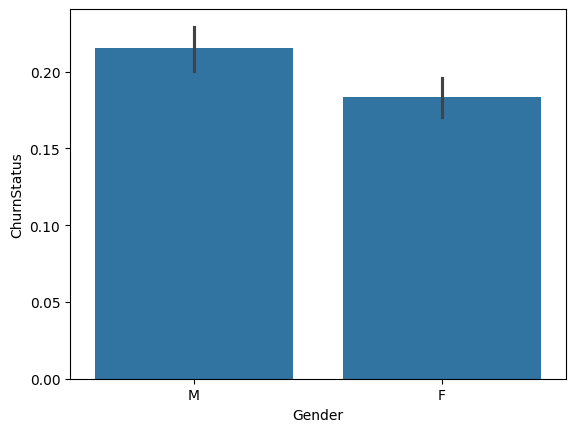

In [18]:
# visualize 
sns.barplot(data=df1,x='Gender', y='ChurnStatus')

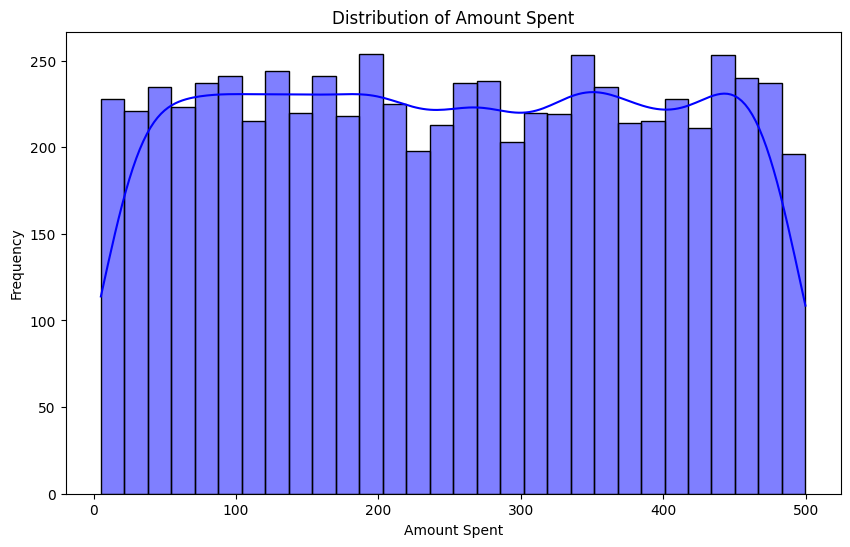

In [19]:

# Plot distribution of AmountSpent
plt.figure(figsize=(10, 6))
sns.histplot(df1['AmountSpent'], kde=True, bins=30, color='blue')
plt.title('Distribution of Amount Spent')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()


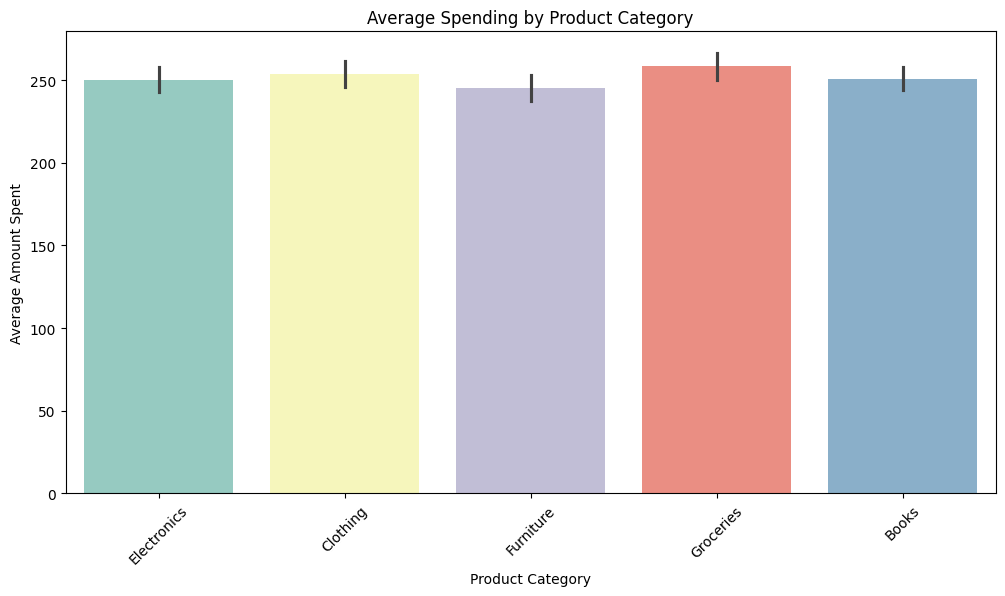

In [20]:
# distribution of product category by amount spent
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductCategory', y='AmountSpent', data=df1, palette='Set3')
plt.title('Average Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.show()


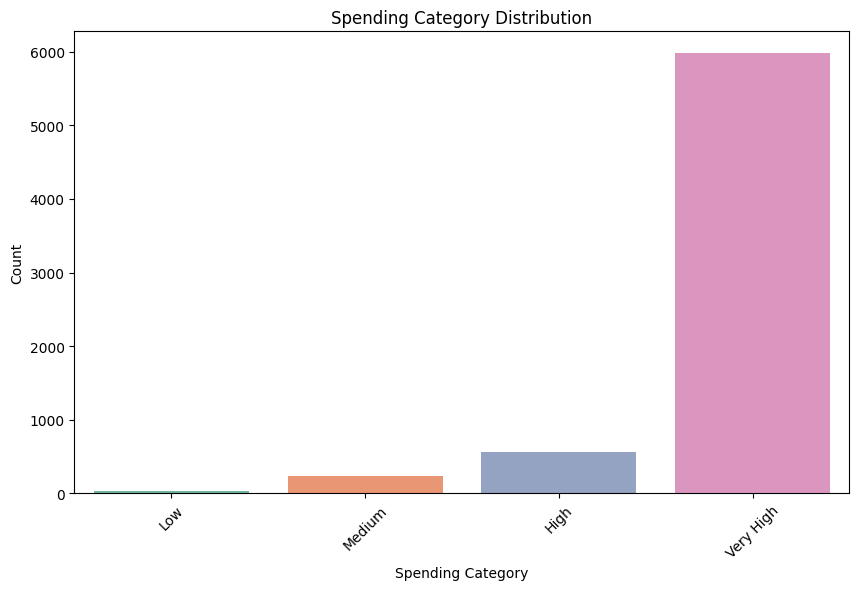

In [21]:
# visualize the spending category 
plt.figure(figsize=(10, 6))
sns.countplot(x='SpendingCategory', data=df1, palette='Set2')
plt.title('Spending Category Distribution')
plt.xlabel('Spending Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


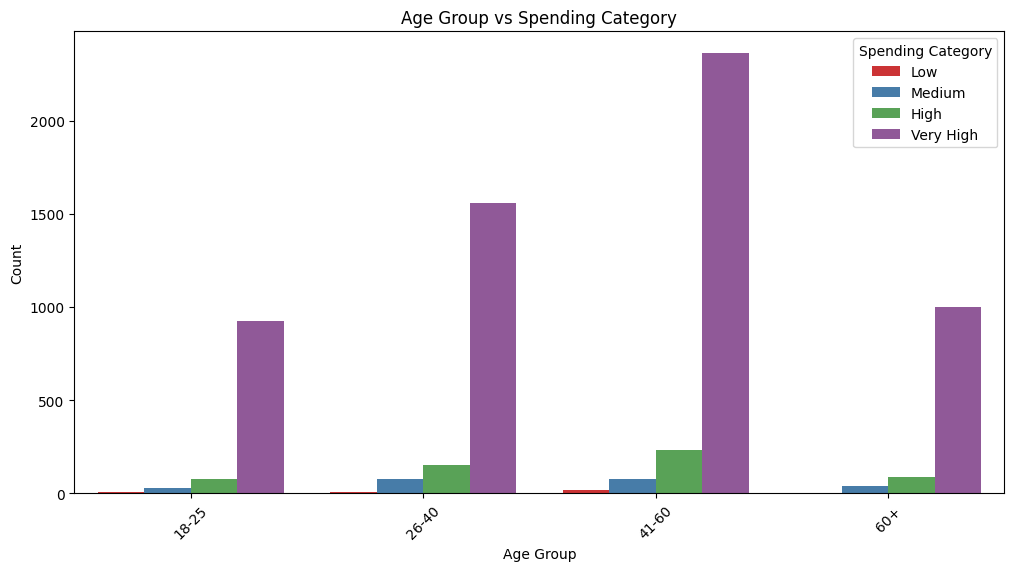

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='SpendingCategory', data=df1, palette='Set1')
plt.title('Age Group vs Spending Category')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Spending Category')
plt.show()


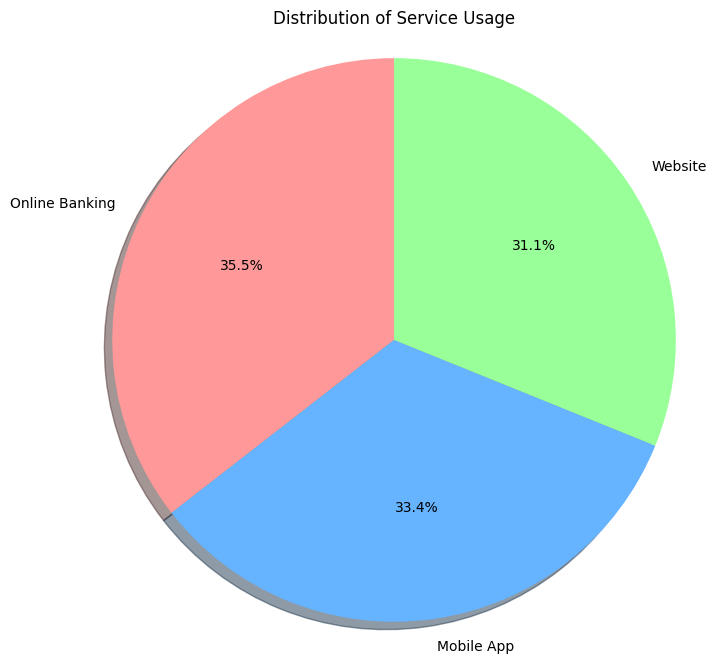

In [23]:
# the distribution of the Service Usage
service_usage_counts = df1['ServiceUsage'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(service_usage_counts, labels=service_usage_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], shadow=True)
plt.title('Distribution of Service Usage')
plt.axis('equal') 
plt.show()

EDA

In [24]:
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
df1[numeric_cols] = df1[numeric_cols].fillna(df1[numeric_cols].median())

# Fill categorical columns with the mode (most frequent value)
categorical_cols = df1.select_dtypes(include=['object']).columns
df1[categorical_cols] = df1[categorical_cols].fillna(df1[categorical_cols].mode().iloc[0])

In [25]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoders
label_encoders = {
    'Gender': LabelEncoder(),
    'MaritalStatus': LabelEncoder(),
    'IncomeLevel': LabelEncoder(),
    'ProductCategory': LabelEncoder(),
    'ServiceUsage': LabelEncoder(),
    'AgeGroup': LabelEncoder(),
    'FrequentProductCategory': LabelEncoder(),
    'SpendingCategory': LabelEncoder()
}

# Fit and transform categorical features
for column, encoder in label_encoders.items():
    encoder.fit(df1[column])
    df1[column] = encoder.transform(df1[column])

df1.head()

,AmountSpent,ProductCategory,Age,Gender,MaritalStatus,IncomeLevel,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,...,RecencyOfLastTransaction,TransactionMonth,TransactionDayOfWeek,AgeGroup,NumberOfInteractions,RecencyOfLastInteraction,UnresolvedIssuesCount,FrequentProductCategory,TransactionCount,SpendingCategory
0,416.50,2,62,1,2,1,2023-10-21,34,0,0,...,645,3,6,3,1,641.0,0,2,1,2
1,54.96,1,65,1,1,1,2023-12-05,5,2,1,...,408,8,0,3,7,655.0,0,2,7,3
2,197.50,2,65,1,1,1,2023-12-05,5,2,1,...,408,7,0,3,7,655.0,0,2,7,3
3,101.31,3,65,1,1,1,2023-12-05,5,2,1,...,408,1,1,3,7,655.0,0,2,7,3
4,397.37,1,65,1,1,1,2023-12-05,5,2,1,...,408,7,6,3,7,655.0,0,2,7,3


In [26]:
# Step 3: Scale Numerical Features
scaler = StandardScaler()

# Identify the columns to scale
numeric_features = ['AmountSpent', 'Age', 'LoginFrequency', 'RecencyOfLastTransaction', 'TransactionMonth', 
                    'TransactionDayOfWeek', 'NumberOfInteractions', 'RecencyOfLastInteraction', 
                    'UnresolvedIssuesCount', 'TransactionCount']

# Apply standard scaling to these features
df1[numeric_features] = scaler.fit_transform(df1[numeric_features])

# Preview the cleaned and preprocessed data
df1.head()

,AmountSpent,ProductCategory,Age,Gender,MaritalStatus,IncomeLevel,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,...,RecencyOfLastTransaction,TransactionMonth,TransactionDayOfWeek,AgeGroup,NumberOfInteractions,RecencyOfLastInteraction,UnresolvedIssuesCount,FrequentProductCategory,TransactionCount,SpendingCategory
0,1.153881,2,1.225036,1,2,1,2023-10-21,0.588556,0,0,...,3.915474,-1.019533,1.528069,3,-1.163740,1.606197,-0.854615,2,-1.821254,2
1,-1.376296,1,1.421298,1,1,1,2023-12-05,-1.473886,2,1,...,-0.265325,0.437371,-1.451523,3,-0.213251,1.776076,-0.854615,2,-0.581649,3
2,-0.378753,2,1.421298,1,1,1,2023-12-05,-1.473886,2,1,...,-0.265325,0.145990,-1.451523,3,-0.213251,1.776076,-0.854615,2,-0.581649,3
3,-1.051923,3,1.421298,1,1,1,2023-12-05,-1.473886,2,1,...,-0.265325,-1.602295,-0.954924,3,-0.213251,1.776076,-0.854615,2,-0.581649,3
4,1.020003,1,1.421298,1,1,1,2023-12-05,-1.473886,2,1,...,-0.265325,0.145990,1.528069,3,-0.213251,1.776076,-0.854615,2,-0.581649,3


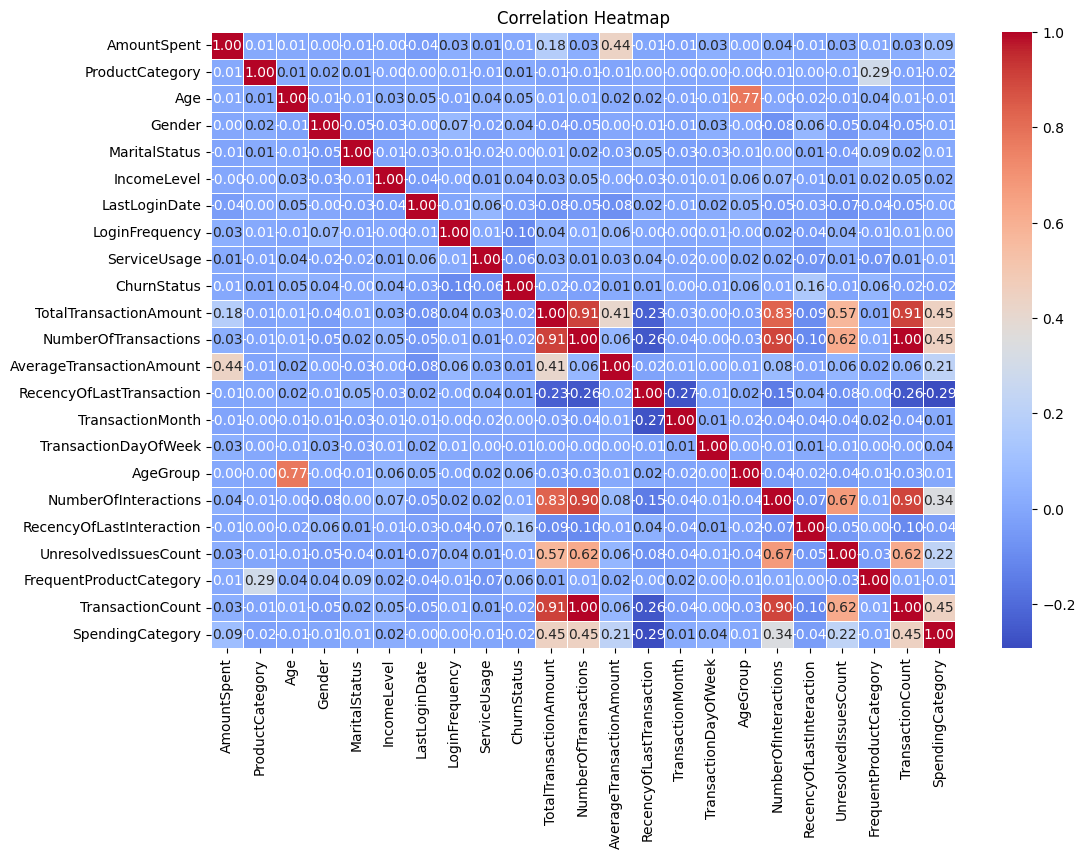

In [27]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [28]:
# the information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AmountSpent               6812 non-null   float64       
 1   ProductCategory           6812 non-null   int64         
 2   Age                       6812 non-null   float64       
 3   Gender                    6812 non-null   int64         
 4   MaritalStatus             6812 non-null   int64         
 5   IncomeLevel               6812 non-null   int64         
 6   LastLoginDate             6812 non-null   datetime64[ns]
 7   LoginFrequency            6812 non-null   float64       
 8   ServiceUsage              6812 non-null   int64         
 9   ChurnStatus               6812 non-null   int64         
 10  TotalTransactionAmount    6812 non-null   float64       
 11  NumberOfTransactions      6812 non-null   int64         
 12  AverageTransactionAm

In [29]:
df1.describe()

,AmountSpent,ProductCategory,Age,Gender,MaritalStatus,IncomeLevel,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,...,RecencyOfLastTransaction,TransactionMonth,TransactionDayOfWeek,AgeGroup,NumberOfInteractions,RecencyOfLastInteraction,UnresolvedIssuesCount,FrequentProductCategory,TransactionCount,SpendingCategory
count,6.812000e+03,6812.000000,6.812000e+03,6812.000000,6812.000000,6812.000000,6812,6.812000e+03,6812.000000,6812.000000,...,6.812000e+03,6.812000e+03,6.812000e+03,6812.000000,6.812000e+03,6.812000e+03,6.812000e+03,6812.000000,6.812000e+03,6812.000000
mean,4.172300e-18,1.984146,1.783658e-16,0.474457,1.517763,0.988990,2023-07-06 04:56:47.633587712,4.485223e-17,0.977540,0.198473,...,-3.129225e-17,4.589530e-17,8.448908e-17,1.640781,-1.126521e-16,2.472088e-16,-4.172300e-18,1.545068,-4.172300e-17,2.706694
min,-1.724672e+00,0.000000,-1.653478e+00,0.000000,0.000000,0.000000,2023-01-01 00:00:00,-1.758361e+00,0.000000,0.000000,...,-1.006226e+00,-1.602295e+00,-1.451523e+00,0.000000,-1.322154e+00,-1.718579e+00,-8.546152e-01,0.000000,-1.821254e+00,0.000000
25%,-8.714359e-01,1.000000,-8.684290e-01,0.000000,0.000000,0.000000,2023-04-12 00:00:00,-8.338177e-01,0.000000,0.000000,...,-7.063374e-01,-7.281524e-01,-9.549245e-01,1.000000,-1.005325e+00,-7.387408e-01,-8.546152e-01,0.000000,-7.882497e-01,3.000000
50%,1.570936e-03,2.000000,4.746175e-02,0.000000,2.000000,1.000000,2023-07-13 00:00:00,1.960671e-02,1.000000,0.000000,...,-3.182464e-01,1.459898e-01,3.827280e-02,2.000000,-5.483590e-02,-5.619111e-02,-4.403227e-01,1.000000,-1.684471e-01,3.000000
75%,8.654100e-01,3.000000,8.325109e-01,1.000000,3.000000,2.000000,2023-10-01 00:00:00,8.730311e-01,2.000000,0.000000,...,3.520927e-01,7.287512e-01,1.031470e+00,2.000000,8.956530e-01,5.505197e-01,8.025550e-01,3.000000,8.645574e-01,3.000000
max,1.737262e+00,4.000000,1.682981e+00,1.000000,3.000000,2.000000,2023-12-31 00:00:00,1.655337e+00,2.000000,1.000000,...,5.256152e+00,1.602893e+00,1.528069e+00,4.000000,1.529312e+00,2.637605e+00,2.874018e+00,4.000000,1.690961e+00,3.000000
std,1.000073e+00,1.421684,1.000073e+00,0.499384,1.154543,0.822187,NaN,1.000073e+00,0.802796,0.398880,...,1.000073e+00,1.000073e+00,1.000073e+00,1.000073,1.000073e+00,1.000073e+00,1.000073e+00,1.398615,1.000073e+00,0.845239


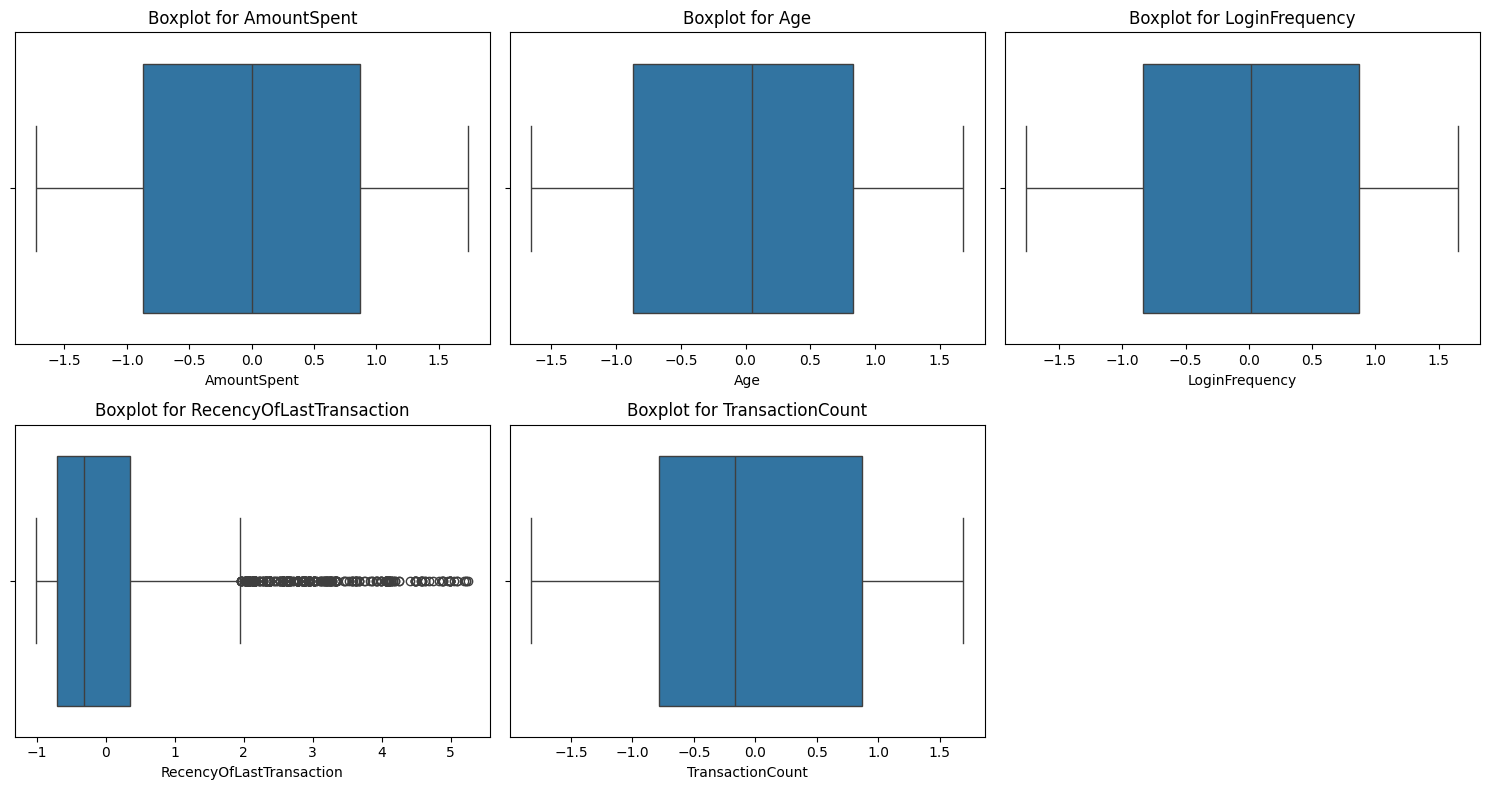

In [30]:
# List of numerical columns for boxplot visualization
numerical_cols = ['AmountSpent', 'Age', 'LoginFrequency', 'RecencyOfLastTransaction', 'TransactionCount']

# Plotting boxplots for each numerical column
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df1, x=col)
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()


In [31]:
# Solving the outlier using Interquartile Range (IQR) for 'RecencyOfLastTransaction'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df1['RecencyOfLastTransaction'].quantile(0.25)
Q3 = df1['RecencyOfLastTransaction'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset by removing outliers
df_filtered = df1[(df1['RecencyOfLastTransaction'] >= lower_bound) & (df1['RecencyOfLastTransaction'] <= upper_bound)]

# Display the number of rows after removing outliers
df_filtered.shape, df1.shape


((6427, 23), (6812, 23))

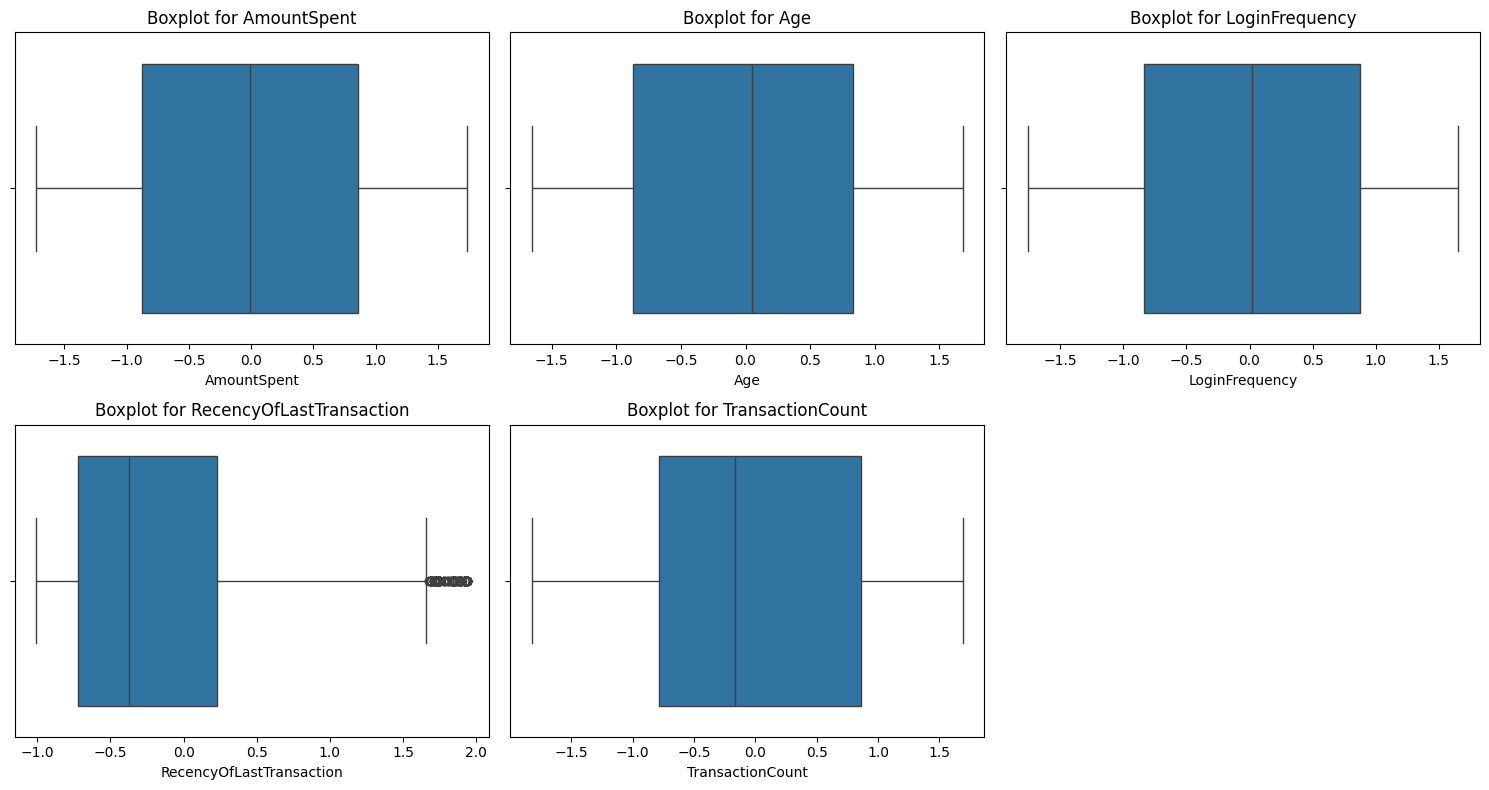

In [32]:
# List of numerical columns for boxplot visualization
numerical_cols = ['AmountSpent', 'Age', 'LoginFrequency', 'RecencyOfLastTransaction', 'TransactionCount']

# Plotting boxplots for each numerical column
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_filtered, x=col)
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()


In [33]:
X = df_filtered.drop(columns=['ChurnStatus'])  # All features except ChurnStatus
y = df_filtered['ChurnStatus']  # Target variable

In [34]:
# Convert 'LastLoginDate' to numeric features (e.g., year, month)
X['LastLoginYear'] = X['LastLoginDate'].dt.year
X['LastLoginMonth'] = X['LastLoginDate'].dt.month
X = X.drop(['LastLoginDate'], axis=1)  # Now drop the original datetime column


In [35]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm, y_sm =smote.fit_resample(X,y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.3, random_state=42)


## BALANCE THE DATA

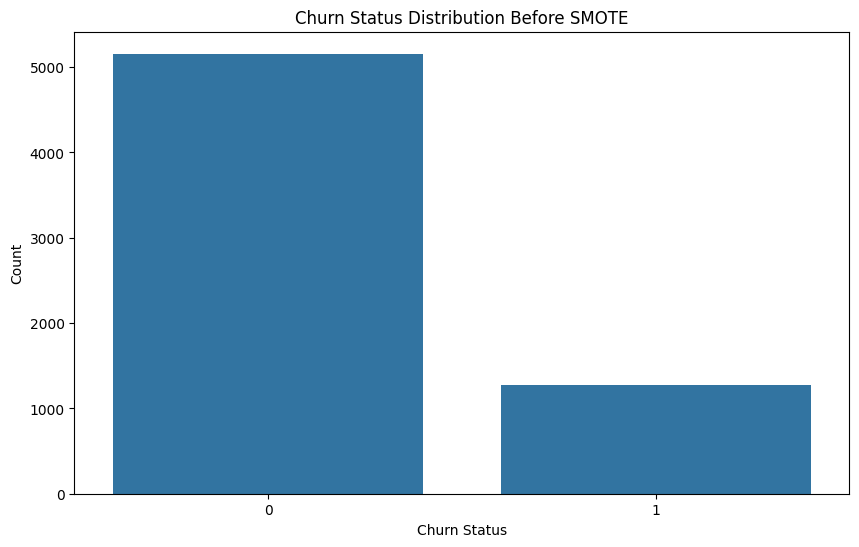

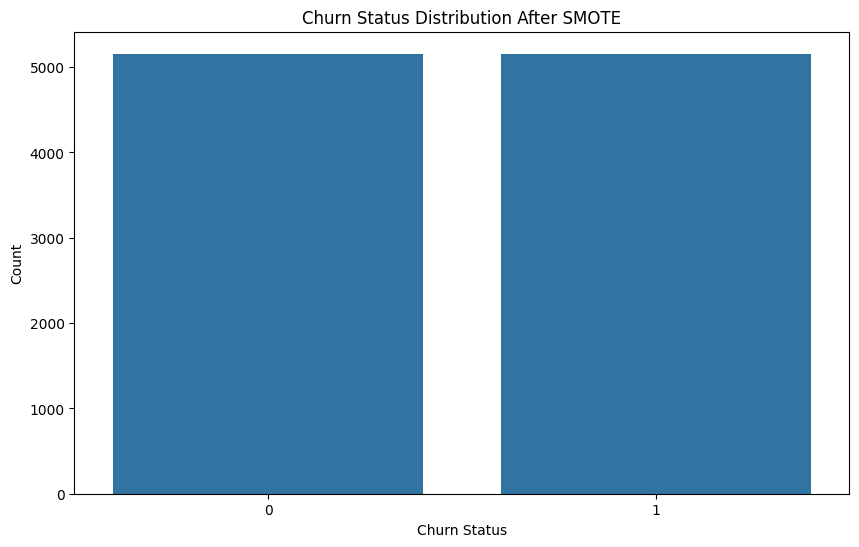

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ChurnStatus', data=df_filtered)  # Original dataset
plt.title('Churn Status Distribution Before SMOTE')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()
# Convert the resampled target variable y_sm to a DataFrame
y_sm_df = pd.DataFrame(y_sm, columns=['ChurnStatus'])

# Visualize the distribution of ChurnStatus after SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x='ChurnStatus', data=y_sm_df)  # SMOTE dataset
plt.title('Churn Status Distribution After SMOTE')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()

# Training and Evaluating the models

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the model
rf_model = RandomForestClassifier( random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9987075928917609
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1591
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      3095
   macro avg       1.00      1.00      1.00      3095
weighted avg       1.00      1.00      1.00      3095

Confusion Matrix:
 [[1591    0]
 [   4 1500]]


In [39]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
# Initialize XGBoost model
xgb_model = XGBClassifier()
from imblearn.pipeline import Pipeline as ImbPipeline
# Pipeline
pipeline = ImbPipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('model', xgb_model)
])

# Define GridSearchCV parameters
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

  # Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 1.0}
Best Score: 0.997783645567579


In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9987075928917609


In [42]:
# Predict and evaluate
y_pred = grid_search.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1591    0]
 [   3 1501]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1591
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      3095
   macro avg       1.00      1.00      1.00      3095
weighted avg       1.00      1.00      1.00      3095



## Recommendations and Business Implications
The model's outputs can be used to develop targeted retention strategies for at-risk customers. Further improvements could include integrating additional data sources and exploring more complex models like Neural Networks.
